## Import the libraries needed

In [1]:
import warnings
warnings.filterwarnings('ignore')
import itertools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import rcParams
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

## Import the dataset: Zillow

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()
# zipcode is the RegionName

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Focusing on only the state of NJ

In [3]:
nj = df[df['State']=='NJ']
nj.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
73,61148,8701,Lakewood,NJ,New York,Ocean,74,153800.0,153400.0,153000.0,...,400500,403900,408400,411000,412600,414000,415700,415600,413400,410700
158,61169,8753,Toms River,NJ,New York,Ocean,159,123400.0,123200.0,122900.0,...,258600,258700,259000,259500,261200,262500,262600,262400,263400,264300
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300


## Looking at investing in the Hudson County Area - filter out the dataset to only show the Hudson County information

In [4]:
nj_Hudson = nj[nj['CountyName']=='Hudson']
nj_Hudson.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
214,60599,7093,West New York,NJ,New York,Hudson,215,131700.0,131900.0,132100.0,...,361200,368200,376800,386200,392900,395100,395500,399400,407000,412700
319,60594,7087,Union City,NJ,New York,Hudson,320,127300.0,127000.0,126700.0,...,367000,377500,386000,394700,403700,410500,415500,424000,437400,448900


## Testing the model on one city only at the moment - West New York

In [5]:
wny = nj_Hudson[nj_Hudson['City']=='West New York']
wny

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
214,60599,7093,West New York,NJ,New York,Hudson,215,131700.0,131900.0,132100.0,...,361200,368200,376800,386200,392900,395100,395500,399400,407000,412700


## To get the dataset ready for the ARIMA process, need to make sure that the dates are rows, and not the columns

In [6]:
wny = wny.drop(['RegionID', 'City', 'State', 'RegionName', 'Metro', 'CountyName', 'SizeRank'],axis=1)
wny_df = wny.melt()
display(wny_df.head())
display(wny_df.info())

,variable,value
0,1996-04,131700.0
1,1996-05,131900.0
2,1996-06,132100.0
3,1996-07,132300.0
4,1996-08,132500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
variable    265 non-null object
value       265 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


None

## Changing the name of the columns, because... well I don't like the ones that they have.

In [7]:
wny_df.columns = ['Date', 'value']
wny_df.Date = pd.to_datetime(wny_df['Date'])
wny_df.set_index('Date', inplace=True)
wny_df.tail()

,value
Date,
2017-12-01,395100.0
2018-01-01,395500.0
2018-02-01,399400.0
2018-03-01,407000.0
2018-04-01,412700.0


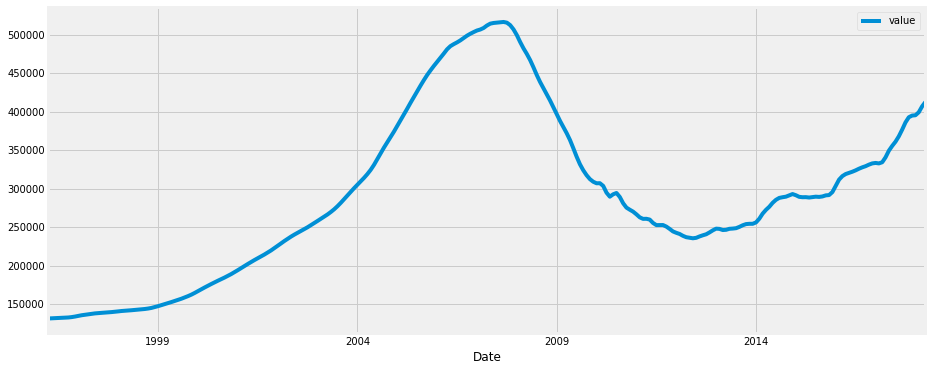

In [8]:
wny_df.plot(figsize=(14,6));

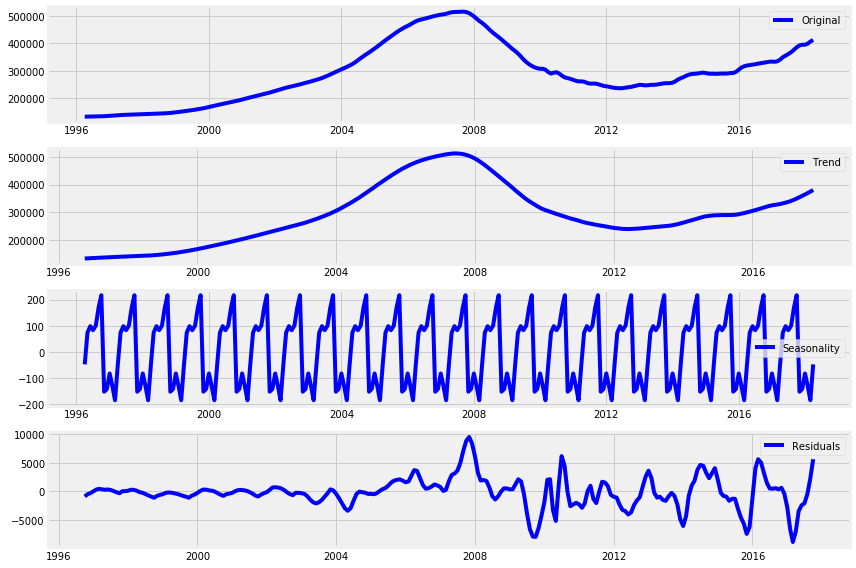

In [9]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(wny_df)
# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_df, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
# residuals is noise
# seasonality shows what the window could be because it shows a trend yearly -- hence 12

### Grid search for appropriate p,d,q

In [34]:
p = d = q = range(0,2)
from itertools import product
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [35]:
for param in pdq:
    for param_seasonal in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(wny_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodel

/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/s

### The ARIMA model shows that the best parameters to use are (1,1,1) x (1,1,1,12) with the smalled AIC value of 4164.33

In [36]:
ans = []
ans.append([param, param_seasonal, results.aic])
ans_df = pd.DataFrame(ans, columns = ['pdq', 'pdqs', 'aic'])
display(ans_df)

,pdq,pdqs,aic
0,"(1, 1, 1)","(1, 1, 1, 12)",4164.332667


In [37]:
mod = sm.tsa.statespace.SARIMAX(wny_df,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/Users/juliettec/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7746      0.040     19.556      0.000       0.697       0.852
ma.L1          0.8068      0.043     18.835      0.000       0.723       0.891
ar.S.L12       0.1493      0.041      3.676      0.000       0.070       0.229
ma.S.L12      -0.4763      0.032    -15.066      0.000      -0.538      -0.414
sigma2      2.503e+06   1.94e+05     12.912      0.000    2.12e+06    2.88e+06


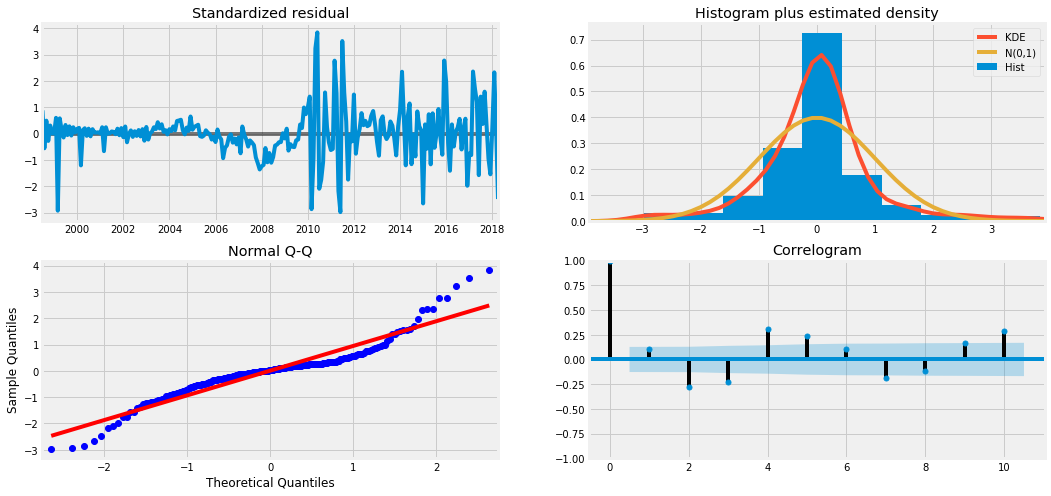

In [39]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

### Set dynamic = True to show the prediction values with given data.

In [40]:
# we need to get predictions starting at a date that makes sense. From 2015-01-01 to end 
# which is 2018-04-01
prediction_wny = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True)
pred_conf_wny = prediction_wny.conf_int()

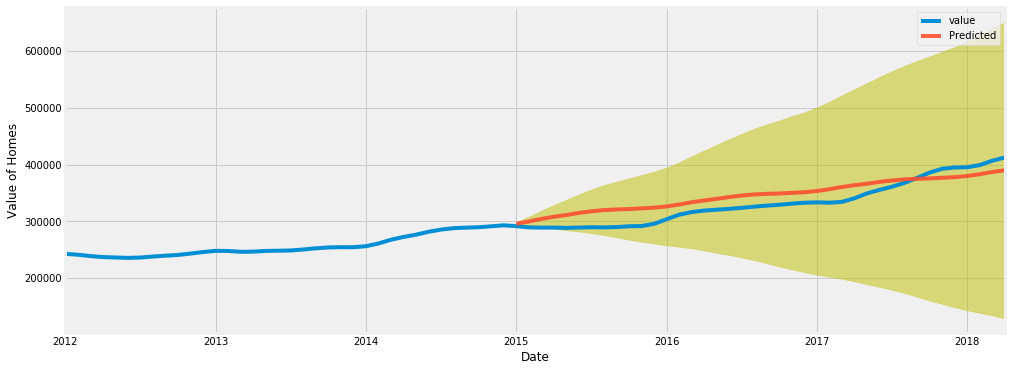

In [42]:
ax = wny_df['2012':].plot(label='Observed')
prediction_wny.predicted_mean.plot(ax=ax, label='Predicted',
                                  alpha = 0.9, figsize=(15,6))

ax.fill_between(pred_conf_wny.index,
               pred_conf_wny.iloc[:, 0],
               pred_conf_wny.iloc[:, 1], color = 'y', alpha = 0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Value of Homes')
plt.legend()
plt.show()

### Looking at the predicted values with the ARIMA model looks close.  Use RMSE and MAE to see what the difference are.

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
wny_forecasted = prediction_wny.predicted_mean
wny_truth = wny_df['2015-01-01':]
mse = mean_squared_error(wny_truth, wny_forecasted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(wny_truth, wny_forecasted)
print('The Mean Squared Error of our forecast is {}' .format(round(mse,2)))
print('The Root Mean Squared Error of our forecast is {}' .format(round(rmse,2)))
print('The Mean Absolute Error of our forecast is {}' .format(round(mae,2)))
# source: 
# https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

The Mean Squared Error of our forecast is 421902198.77
The Root Mean Squared Error of our forecast is 20540.26
The Mean Absolute Error of our forecast is 19346.07


In [19]:
prediction_wny2 = results.get_forecast(steps=60)
pred_conf_wny2 = prediction_wny2.conf_int()

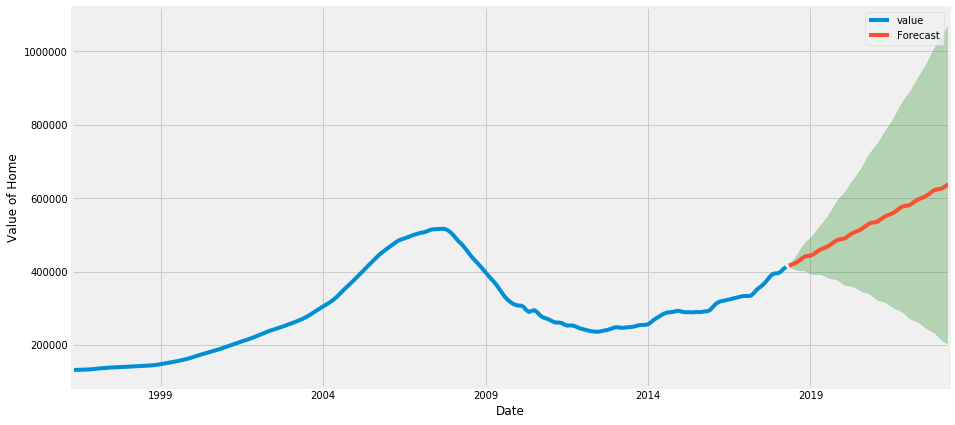

In [33]:
ax = wny_df.plot(label='Observed', figsize=(14,7))
forecast = list(prediction_wny2.predicted_mean.values)
index = list(prediction_wny2.predicted_mean.index)
forecast.insert(0, list(wny_df.value)[-1])
index.insert(0, list(wny_df.index)[-1])
prediction_wny2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf_wny2.index,
               pred_conf_wny2.iloc[:, 0],
               pred_conf_wny2.iloc[:, 1], color = 'g', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Value of Home')
plt.legend()
plt.show()